### This script contains:

#### 1. Import libraries & dataset
#### 2. Data Checks and Wrangling
#### 3. Checking and removing hires of over 1 day
####  - Creating a Flag to show which entries are over a day in length
####  - Creating a subset of hires that lasted for between 1 and 2 days, and over 2 days
####  - Exporting those 2 subsets, and removing the entries from the main dataset
#### 4. Checking and removing hires by people aged over 100
#### 5. Creating a Correlation Matrix Heat Map 
#### 6. Creating a Scatterplot for Month/Temp
#### 7. Creating a Pair Plot
#### 8. Exporting the dataset
#### 9. Questions

## 1. Import libraries & dataset

In [2]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
#Folder path into usable string
path = r'C:\Users\willm\Dropbox\1 Data Analytics Course\1 New York Citibike Hire'

In [4]:
#Import Hire Dataset
NYB2020 = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'NYB2020merged.pkl'))

In [5]:
#Set Pandas to show all columns
pd.set_option("display.max_columns", None)

In [6]:
#Ensuring we see the full Latitudes and Longitudes
pd.set_option('display.precision', 10)

In [7]:
%matplotlib inline

## 2. Data Checks and Wrangling 

In [7]:
NYB2020.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_hour,start_date2,temp,rain_snow,day_of_week,day_of_week_number,month,month_number,TripMins,age
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.7322185300,-73.9816555700,307,Canal St & Rutgers St,40.7142748700,-73.9899002500,30326,Subscriber,1992,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,13.0,28
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.6610633719,-73.9794525504,3300,Prospect Park West & 8 St,40.6651468153,-73.9763760567,17105,Customer,1969,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,26.0,51
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.7432268143,-73.9744978398,259,South St & Whitehall St,40.7012212800,-74.0123421800,40177,Subscriber,1963,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,24.0,57
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.7365288900,-74.0061802600,490,8 Ave & W 33 St,40.7515510000,-73.9939340000,27690,Subscriber,1980,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,10.0,40
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.6945460872,-73.9580136538,3637,Fulton St & Waverly Ave,40.6832386546,-73.9659959078,32583,Subscriber,1982,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,12.0,38


In [8]:
NYB2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19506857 entries, 0 to 19506856
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start_station_id         int16  
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           int16  
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bikeid                   int32  
 12  usertype                 object 
 13  birth_year               int16  
 14  gender                   int8   
 15  start_hour               int8   
 16  start_date2              object 
 17  temp                     int8   
 18  rain_snow                float16
 19  day_of_week              object 
 20  day_of_week_number       int8   
 21  month 

In [9]:
NYB2020['TripMins'] = NYB2020['TripMins'].astype('int32')

In [10]:
NYB2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19506857 entries, 0 to 19506856
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start_station_id         int16  
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           int16  
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bikeid                   int32  
 12  usertype                 object 
 13  birth_year               int16  
 14  gender                   int8   
 15  start_hour               int8   
 16  start_date2              object 
 17  temp                     int8   
 18  rain_snow                float16
 19  day_of_week              object 
 20  day_of_week_number       int8   
 21  month 

In [11]:
NYB2020.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_hour,start_date2,temp,rain_snow,day_of_week,day_of_week_number,month,month_number,TripMins,age
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.7322185300,-73.9816555700,307,Canal St & Rutgers St,40.7142748700,-73.9899002500,30326,Subscriber,1992,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,13,28
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.6610633719,-73.9794525504,3300,Prospect Park West & 8 St,40.6651468153,-73.9763760567,17105,Customer,1969,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,26,51
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.7432268143,-73.9744978398,259,South St & Whitehall St,40.7012212800,-74.0123421800,40177,Subscriber,1963,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,24,57
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.7365288900,-74.0061802600,490,8 Ave & W 33 St,40.7515510000,-73.9939340000,27690,Subscriber,1980,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,10,40
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.6945460872,-73.9580136538,3637,Fulton St & Waverly Ave,40.6832386546,-73.9659959078,32583,Subscriber,1982,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,12,38


In [12]:
NYB2020.describe()

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,start_hour,temp,rain_snow,day_of_week_number,month_number,TripMins,age
count,1.9506857000e+07,1.9506857000e+07,1.9506857000e+07,1.9506857000e+07,1.9506857000e+07,1.9506857000e+07,1.9506857000e+07,1.9506857000e+07,1.9506857000e+07,1.9506857000e+07,1.9506857000e+07,1.9506857000e+07,19506857.0,1.9506857000e+07,1.9506857000e+07,1.9506857000e+07,1.9506857000e+07
mean,1.3108227983e+03,2.0260800904e+03,4.0740410898e+01,-7.3977084372e+01,2.0198332815e+03,4.0740038841e+01,-7.3977258019e+01,3.5547503067e+04,1.9811490671e+03,1.1740565382e+00,1.4271047048e+01,1.7521665843e+01,NaN,4.0709120900e+00,7.1069438813e+00,2.1846599788e+01,3.8850932931e+01
std,1.4232696627e+04,1.5427317198e+03,3.4900494444e-02,2.2988527329e-02,1.5435783455e+03,3.4800001752e-02,2.3054309367e-02,9.0294447542e+03,1.2382354852e+01,6.0404512397e-01,4.6576217725e+00,8.2724201753e+00,0.0,1.9955736473e+00,3.1349841661e+00,2.3721191092e+02,1.2382354852e+01
min,6.1000000000e+01,7.2000000000e+01,4.0655399774e+01,-7.4025353193e+01,7.2000000000e+01,4.0655399774e+01,-7.4071455002e+01,1.4529000000e+04,1.8730000000e+03,0.0000000000e+00,0.0000000000e+00,-4.0000000000e+00,0.0,1.0000000000e+00,1.0000000000e+00,1.0000000000e+00,1.6000000000e+01
25%,4.2400000000e+02,4.2300000000e+02,4.0717227400e+01,-7.3993915000e+01,4.2200000000e+02,4.0716887000e+01,-7.3993934000e+01,3.0063000000e+04,1.9690000000e+03,1.0000000000e+00,1.1000000000e+01,1.1000000000e+01,0.0,2.0000000000e+00,5.0000000000e+00,7.0000000000e+00,2.9000000000e+01
50%,7.8000000000e+02,3.0770000000e+03,4.0739445000e+01,-7.3981655570e+01,3.0740000000e+03,4.0739323000e+01,-7.3981854240e+01,3.8087000000e+04,1.9840000000e+03,1.0000000000e+00,1.5000000000e+01,1.9000000000e+01,0.0,4.0000000000e+00,8.0000000000e+00,1.3000000000e+01,3.6000000000e+01
75%,1.4040000000e+03,3.4610000000e+03,4.0763505320e+01,-7.3960876000e+01,3.4610000000e+03,4.0763358900e+01,-7.3960876000e+01,4.2239000000e+04,1.9910000000e+03,2.0000000000e+00,1.8000000000e+01,2.4000000000e+01,0.0,6.0000000000e+00,1.0000000000e+01,2.3000000000e+01,5.1000000000e+01
max,3.7861870000e+06,4.3320000000e+03,4.0852252000e+01,-7.3884308000e+01,4.3320000000e+03,4.0852252000e+01,-7.3884308000e+01,5.0107000000e+04,2.0040000000e+03,2.0000000000e+00,2.3000000000e+01,3.2000000000e+01,4.0,7.0000000000e+00,1.2000000000e+01,6.3103000000e+04,1.4700000000e+02


### - Observations
### birth_year has a min of 1873 - and as such Age has a max of 147!
### tripduration has a max of 3,786,187 - and as such TripMins has a max of 63,103 (1,052 hours/43.82 days!)

## 3. Checking and removing hires of over 1 day

In [13]:
#Creating a new column to display one of three flags, depending on the length of hire
NYB2020.loc[NYB2020['TripMins'] > 2880, 'Day_or_More'] = 'More than 2 days'
NYB2020.loc[(NYB2020['TripMins'] > 1440) & (NYB2020['TripMins'] <= 2880), 'Day_or_More'] = '2 days'
NYB2020.loc[NYB2020['TripMins'] <= 1440, 'Day_or_More'] = 'Less than a Day'

In [14]:
NYB2020['Day_or_More'].value_counts(dropna = False, ascending=True)

2 days                  3362
More than 2 days        5711
Less than a Day     19497784
Name: Day_or_More, dtype: int64

### - Creating a subset of hires that lasted for between 1 and 2 days

In [15]:
NYB2020_2days = NYB2020[NYB2020['Day_or_More']=='2 days']

In [16]:
#Requesting to just view 2 columns to see the new flag working
NYB2020_2days[['TripMins', 'Day_or_More']].tail(10)

,TripMins,Day_or_More
19475212,1575,2 days
19479670,2512,2 days
19480282,1598,2 days
19480857,1730,2 days
19481283,2007,2 days
19487219,1691,2 days
19487283,2850,2 days
19496039,2621,2 days
19497759,2670,2 days
19503976,2348,2 days


### - Creating a subset of hires that lasted for more than 2 days

In [17]:
NYB2020_longhire = NYB2020[NYB2020['Day_or_More']=='More than 2 days']

In [18]:
#Requesting to just view 2 columns to see the new flag working
NYB2020_longhire[['TripMins', 'Day_or_More']].tail(10)

,TripMins,Day_or_More
19453816,4382,More than 2 days
19462907,3638,More than 2 days
19473247,3323,More than 2 days
19474886,4015,More than 2 days
19487863,2999,More than 2 days
19494395,3610,More than 2 days
19494896,3308,More than 2 days
19496457,5539,More than 2 days
19505280,5235,More than 2 days
19505589,4306,More than 2 days


### - Exporting those 2 subsets

In [19]:
#Exporting the trips with '2 days' in the Day_or_More column
NYB2020_2days.to_csv(os.path.join(path, '02 Data','Prepared Data', 'NYB2020_2days.csv'), index = False)

In [20]:
#Exporting the trips with 'More than 2 days' in the Day_or_More column
NYB2020_longhire.to_csv(os.path.join(path, '02 Data','Prepared Data', 'NYB2020_longhire.csv'), index = False)

### - Removing the entries in those 2 subsets from the main dataset

In [21]:
#Removing any entries with '2 days' in the Day_or_More column
NYB2020_1day = NYB2020[NYB2020.Day_or_More != '2 days']

In [22]:
#Removing any entries with 'More than 2 days' in the Day_or_More column
NYB2020_1day = NYB2020_1day[NYB2020_1day.Day_or_More != 'More than 2 days']

In [23]:
#Checking to make sure there are still 19,497,784 entries left, as this was how many entries were flagged 'Less than a Day'
NYB2020_1day.shape

(19497784, 26)

In [24]:
NYB2020_1day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19497784 entries, 0 to 19506856
Data columns (total 26 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start_station_id         int16  
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           int16  
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bikeid                   int32  
 12  usertype                 object 
 13  birth_year               int16  
 14  gender                   int8   
 15  start_hour               int8   
 16  start_date2              object 
 17  temp                     int8   
 18  rain_snow                float16
 19  day_of_week              object 
 20  day_of_week_number       int8   
 21  month 

## 4. Checking and removing hires by people aged over 100

In [25]:
#Creating a new column to display one of two flags, depending on the age of the person hiring the bike
NYB2020_1day.loc[NYB2020_1day['age'] > 99, 'Over_99'] = 'Y'
NYB2020_1day.loc[NYB2020_1day['age'] <= 99, 'Over_99'] = 'N'

In [26]:
NYB2020_1day['Over_99'].value_counts(dropna = False, ascending=True)

Y       10181
N    19487603
Name: Over_99, dtype: int64

### - Creating a subset of hires by people aged over 99

In [27]:
NYB2020_over99 = NYB2020_1day[NYB2020_1day['Over_99']=='Y']

In [28]:
#Requesting to just view 2 columns to see the new flag working
NYB2020_over99[['age', 'Over_99']].tail(20)

,age,Over_99
19488166,102,Y
19492265,102,Y
19492690,123,Y
19493901,102,Y
19494622,123,Y
19496746,120,Y
19496899,123,Y
19497533,120,Y
19497658,120,Y
19498207,127,Y


### - Exporting the subset

In [29]:
#Exporting the trips with 'Y' in the Over_99 column
NYB2020_over99.to_csv(os.path.join(path, '02 Data','Prepared Data', 'NYB2020_over99.csv'), index = False)

### - Removing the entries with Y in the Over_99 column

In [30]:
#Removing any entries with '2 days' in the Day_or_More column
NYB2020_1day = NYB2020_1day[NYB2020_1day.Over_99 != 'Y']

In [31]:
#Checking to make sure there are still 19,487,603 entries left, as this was how many entries were flagged 'N'
NYB2020_1day.shape

(19487603, 27)

## 5. Creating a Correlation Matrix Heat Map

In [32]:
#Creating a Subset of the Age, Trip in Minutes, Temperature, Month and Start_hour variables
NYB2020_1daysub = NYB2020_1day[['age', 'TripMins', 'temp', 'month_number', 'start_hour']]

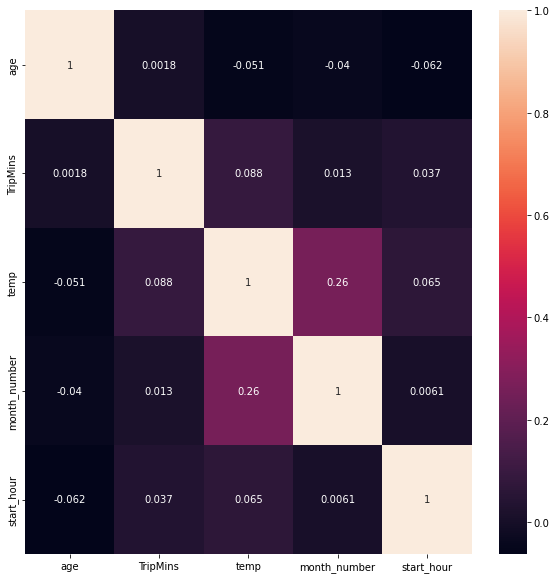

In [33]:
#Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

#Creating a correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(NYB2020_1daysub.corr(), annot = True, ax = ax) 

### - Findings
#### This heatmap shows that there is very little correlation between any of the columns, with only the temperature and month having a 'weak relationship'.
#### Also we can see that the Age of a user has absolutely no correaltion with any of the other variables chosen.

## 6. Creating a Scatterplot for Month/Temp

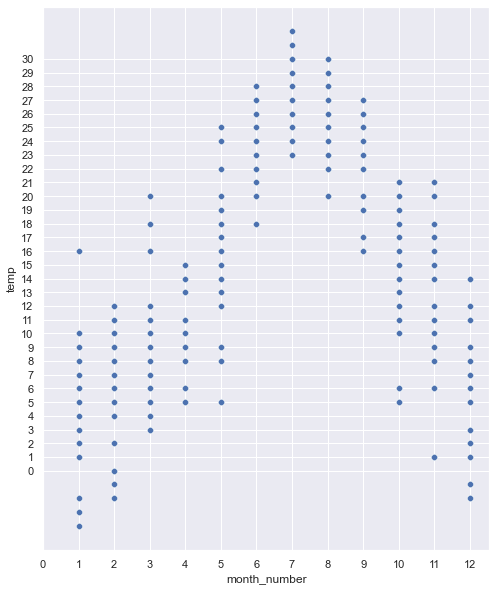

In [34]:
sns.set(rc={"figure.figsize":(8, 10)})
NYB2020_1daysub = sns.scatterplot(x = 'month_number', y = 'temp', data = NYB2020_1day)
plt.xticks(np.arange(0, 13, 1))
plt.yticks(np.arange(0, 31, 1))
plt.show()

### - Findings
#### This shows the range of temperatures there are for each month. 
#### And while July (Month 7) only has 7 temperatures recorded - with a max difference of 7 degrees - , the fact that the others have up to 14 - with a max difference of up to 21 degrees - explains why the correlation (.26) is so low.

## 7. Creating a Pair Plot

In [35]:
#Creating a Subset of the Age, Trip in Minutes, Temperature, Month and Start_hour variables
NYB2020_1daysub2 = NYB2020_1day[['age', 'TripMins', 'temp', 'month_number', 'start_hour']]

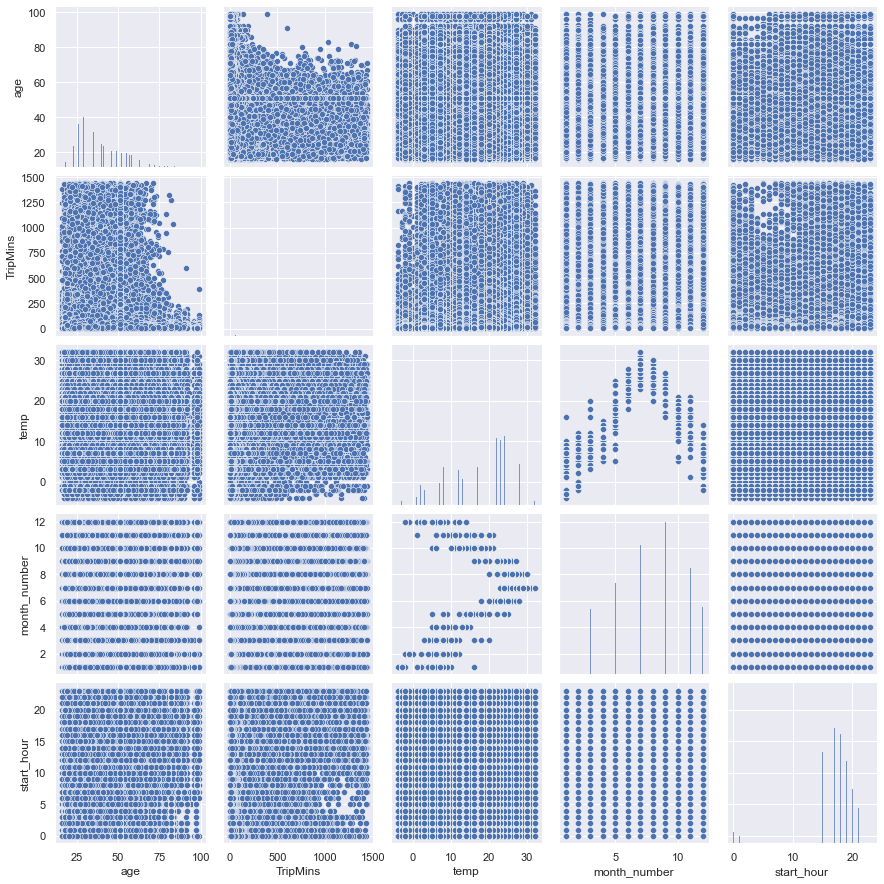

In [36]:
#Creating a Pair Plot using the NYB2020_1daysub created for the correlation heatmap above

PairPlot = sns.pairplot(NYB2020_1daysub2)

### - Findings
#### Age V Trip in Minutes - We can see that people aged approx 75+ only take shorter trips (up to 250 mins - still 4 hours).


## -- Due to memory issues, with the Dataset having 19 million entries, the Categorical Plot was run in the script titled 'NYB2020 Categorical Plot' --

## 8. Exporting the dataset

In [ ]:
NYB2020_1day.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'NYB2020_1day.pkl'))

## 9. Questions

### Are bike hires mainly just for short – up to 15 minute – journeys?

In [12]:
#Creating a new column to display one of three flags, depending on the length of hire
NYB2020_1day.loc[NYB2020_1day['TripMins'] > 299, '15min'] = 'D. Over 5 hours'
NYB2020_1day.loc[(NYB2020_1day['TripMins'] > 60) & (NYB2020_1day['TripMins'] <= 299), '15min'] = 'C. 1 to 5 hours'
NYB2020_1day.loc[(NYB2020_1day['TripMins'] > 15) & (NYB2020_1day['TripMins'] <= 60), '15min'] = 'B. 16min to 1 hour'
NYB2020_1day.loc[NYB2020_1day['TripMins'] <= 15, '15min'] = 'A. Under 16 mins'

In [13]:
NYB2020_1day['15min'].value_counts(dropna = False, ascending=True)

D. Over 5 hours          20861
C. 1 to 5 hours         408009
B. 16min to 1 hour     7825067
A. Under 16 mins      11233666
Name: 15min, dtype: int64

#### 11 million of the 19 million hires are for up to 15 minutes. So, yes, the bikes are mainly used for short journeys.

### What are the most popular day for bike hires?

In [14]:
NYB2020_1day['day_of_week'].value_counts(dropna = False, ascending=True)

Monday       2545841
Friday       2677515
Thursday     2694594
Tuesday      2796335
Wednesday    2825446
Sunday       2862052
Saturday     3085820
Name: day_of_week, dtype: int64

#### Saturday is, with atleast 200k more hires than any other day (200k more = 548 more hires per day).

## Are bike hires by non-subscribers (labelled as ‘customer’ in the dataset) just for short journeys? (They don’t bother subscribing, because they are just doing a short journey on that day?)

In [15]:
crosstab_frequency = pd.crosstab(NYB2020_1day['usertype'], NYB2020_1day['15min'], dropna = False )

In [16]:
crosstab_frequency

15min,A. Under 16 mins,B. 16min to 1 hour,C. 1 to 5 hours,D. Over 5 hours
usertype,,,,
Customer,1657457,2599370,272552,14881
Subscriber,9576209,5225697,135457,5980


#### No. We can see that there are nearly 1 million more journeys made by non-subscribers for between 16 minutes and 1 hour, than there were for the Under 16 minute journeys.